## Ćwiczenie 2. Celem ćwiczenia jest praktyczne wypróbowanie funkcji numpy.fft i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].

Biblioteki używane dla wykonania tego ćwiczenia:

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### 1. Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz i długości 65536.

Aby wygenerować falę sinusoidalną, potrzebujemy zarówno wartości **x**, jak i **y**:
- **x** to tablica liczb o równych odstępach, o długości 65 536. Reprezentuje indeksy próbek.
- **y** to wartości funkcji sinusoidalnej obliczone dla każdego x.

Do wyznaczenia y wykorzystano:
- stałą matematyczną **π** (np.pi),
- częstotliwość sygnału (frequency),
- stałą skalującą 240000, która wpływa na częstotliwość generowanej fali.\
Ostatnia wartość została dobrana eksperymentalnie, aby uzyskać odpowiedni kształt sygnału.

Poniższy kod generuje i wizualizuje falę sinusoidalną:

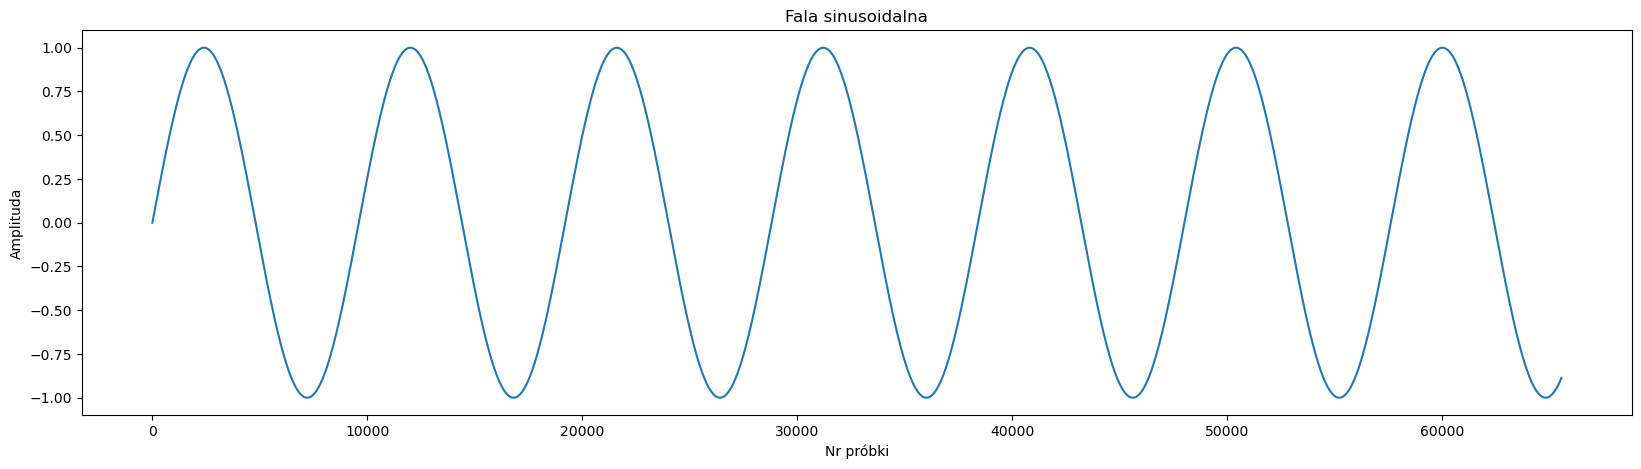

In [25]:
length = 65536 
frequency = 50

x = np.arange(length) # Tworzy tablicę wartości od 0 do length-1
y = np.sin(np.pi/240000 * x * frequency) # Oblicza wartości funkcji sinusoidalnej dla każdej wartości `x`

plt.figure(figsize=(20,5))

plt.subplot(1, 1, 1)
plt.plot(x,y)
plt.title('Fala sinusoidalna')
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')

plt.show()

### 2. Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

Dla wyznaczenia dyskretnej transformaty Fouriera korzystamy ze standardowej funkcji biblioteki NumPy – np.fft.rfft(y), która wykonuje dyskretną transformatę Fouriera (DFT), ale tylko dla rzeczywistego sygnału.

W przeciwieństwie do np.fft.fft(y), która zwraca zespolone współczynniki częstotliwościowe dla częstotliwości dodatnich i ujemnych, rfft(y) oblicza **tylko dodatnie częstotliwości**. Dzieje się tak, ponieważ widmo sygnału rzeczywistego jest symetryczne, więc nie ma potrzeby przechowywania obu połówek.

Transformata Fouriera zwraca wartości zespolone, które zawierają informacje o amplitudzie i fazie. Ponieważ w zadaniu wymagane jest przedstawienie **widma amplitudowego**, stosujemy np.abs(...), aby obliczyć moduł każdego współczynnika i usunąć składową fazową.

Domyślnie DFT nie jest normalizowane, co oznacza, że uzyskane amplitudy mogą nie odpowiadać rzeczywistym wartościom sygnału. Aby skorygować widmo amplitudowe i uzyskać poprawne wartości, dzielimy je przez *(length / 2)*, co zapewnia zgodność z energią sygnału wejściowego.

Dla obliczenia częstotliwości Dyskretnej Transformaty Fouriera korzystamy z funkcji np.fft.rfftfreq(). Ona generuje tablicę częstotliwości odpowiadających wynikowi transformacji Fouriera.

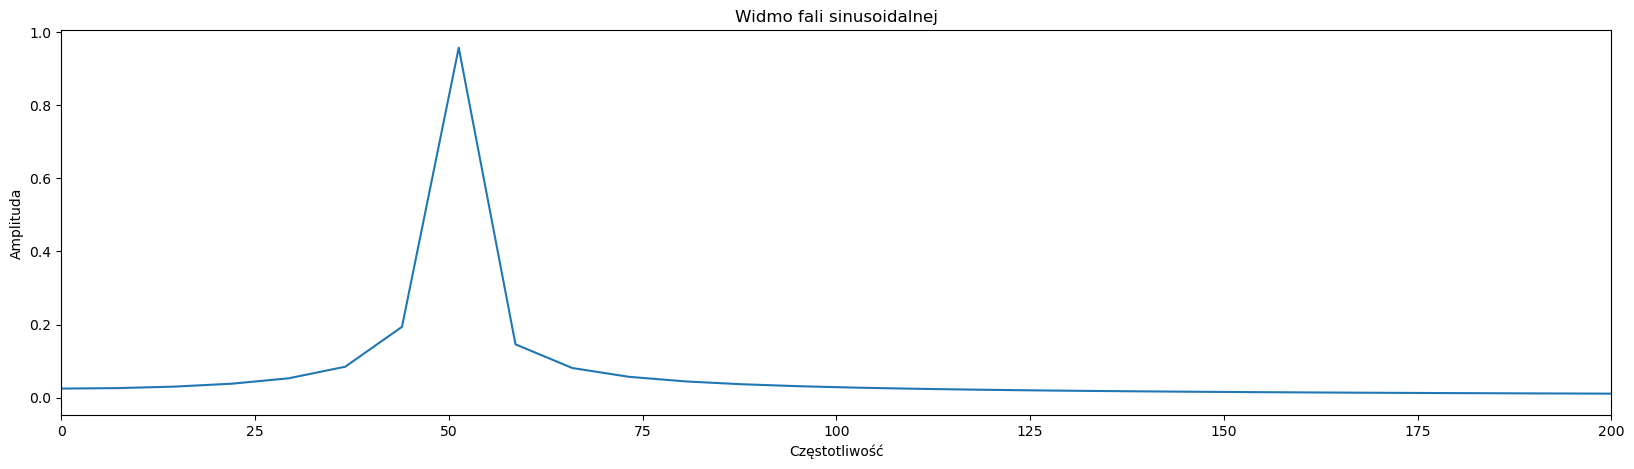

In [18]:
fs = 480000 # czestotliwosc probkowania
spectrum = np.abs(np.fft.rfft(y)) / (length/2)
frequency = np.fft.rfftfreq(length, 1/fs)

plt.figure(figsize=(20,5))

plt.plot(frequency, spectrum)
plt.xlim(0, 200)
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.title('Widmo fali sinusoidalnej')

plt.show() 

### 3. Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego sygnału.

Kolejne zadanie stanowi połączenie dwóch wcześniejszych zadań. Wykorzystując kod z pierwszego zadania, generujemy próbki dwóch fal sinusoidalnych o różnych częstotliwościach. Następnie, aby przedstawić ich kombinację liniową, w funkcji plt.plot() rysujemy sumę sygnałów *y1 + y2*.

Dalsza część zadania polega na wyznaczeniu dyskretnej transformaty Fouriera (DFT) dla otrzymanego sygnału i przedstawieniu jego widma amplitudowego. W tym celu korzystamy z metody np.fft.rfft(), bazując na kodzie z drugiego zadania. Ostatecznie wykres prezentuje zarówno oryginalny sygnał składający się z dwóch nałożonych fal, jak i jego widmo w dziedzinie częstotliwości.

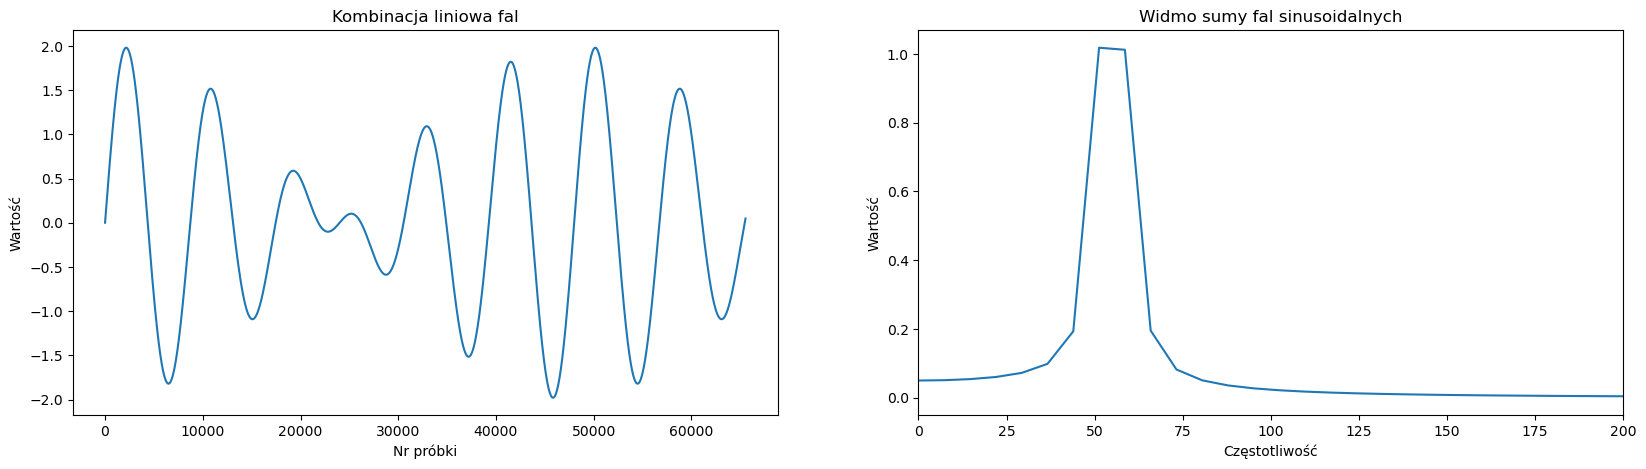

In [22]:
length = 65536 
frequency1 = 50 
frequency2 = 60

x = np.arange(length)
y1 = np.sin(np.pi/240000 * x * frequency1) 
y2 = np.sin(np.pi/240000 * x * frequency2)

spectrum_two_sin = np.fft.rfft(y1 + y2)

plt.figure(figsize=(20,5))

# kombinacja lniowa fal
plt.subplot(1, 2, 1)
plt.plot(x,y1 + y2)
plt.title('Kombinacja liniowa fal')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

#widmo sumy fal sinusoidalnych
plt.subplot(1, 2, 2)
plt.plot(frequency, np.abs(spectrum_two_sin)/ (length/2))
plt.xlim(0, 200)
plt.title('Widmo sumy fal sinusoidalnych')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

plt.show()

### 4. Powtórz eksperymenty dla różnych czasów trwania sygnałów, tzn. dla różnych częstotliwości próbkowania.

To zadanie różni się od trzeciego jedynie możliwością wyboru częstotliwości próbkowania. Aby zobrazować wpływ częstotliwości próbkowania na wykresy oraz ich różnice, wybraliśmy wartości 480000 Hz i 120000 Hz.

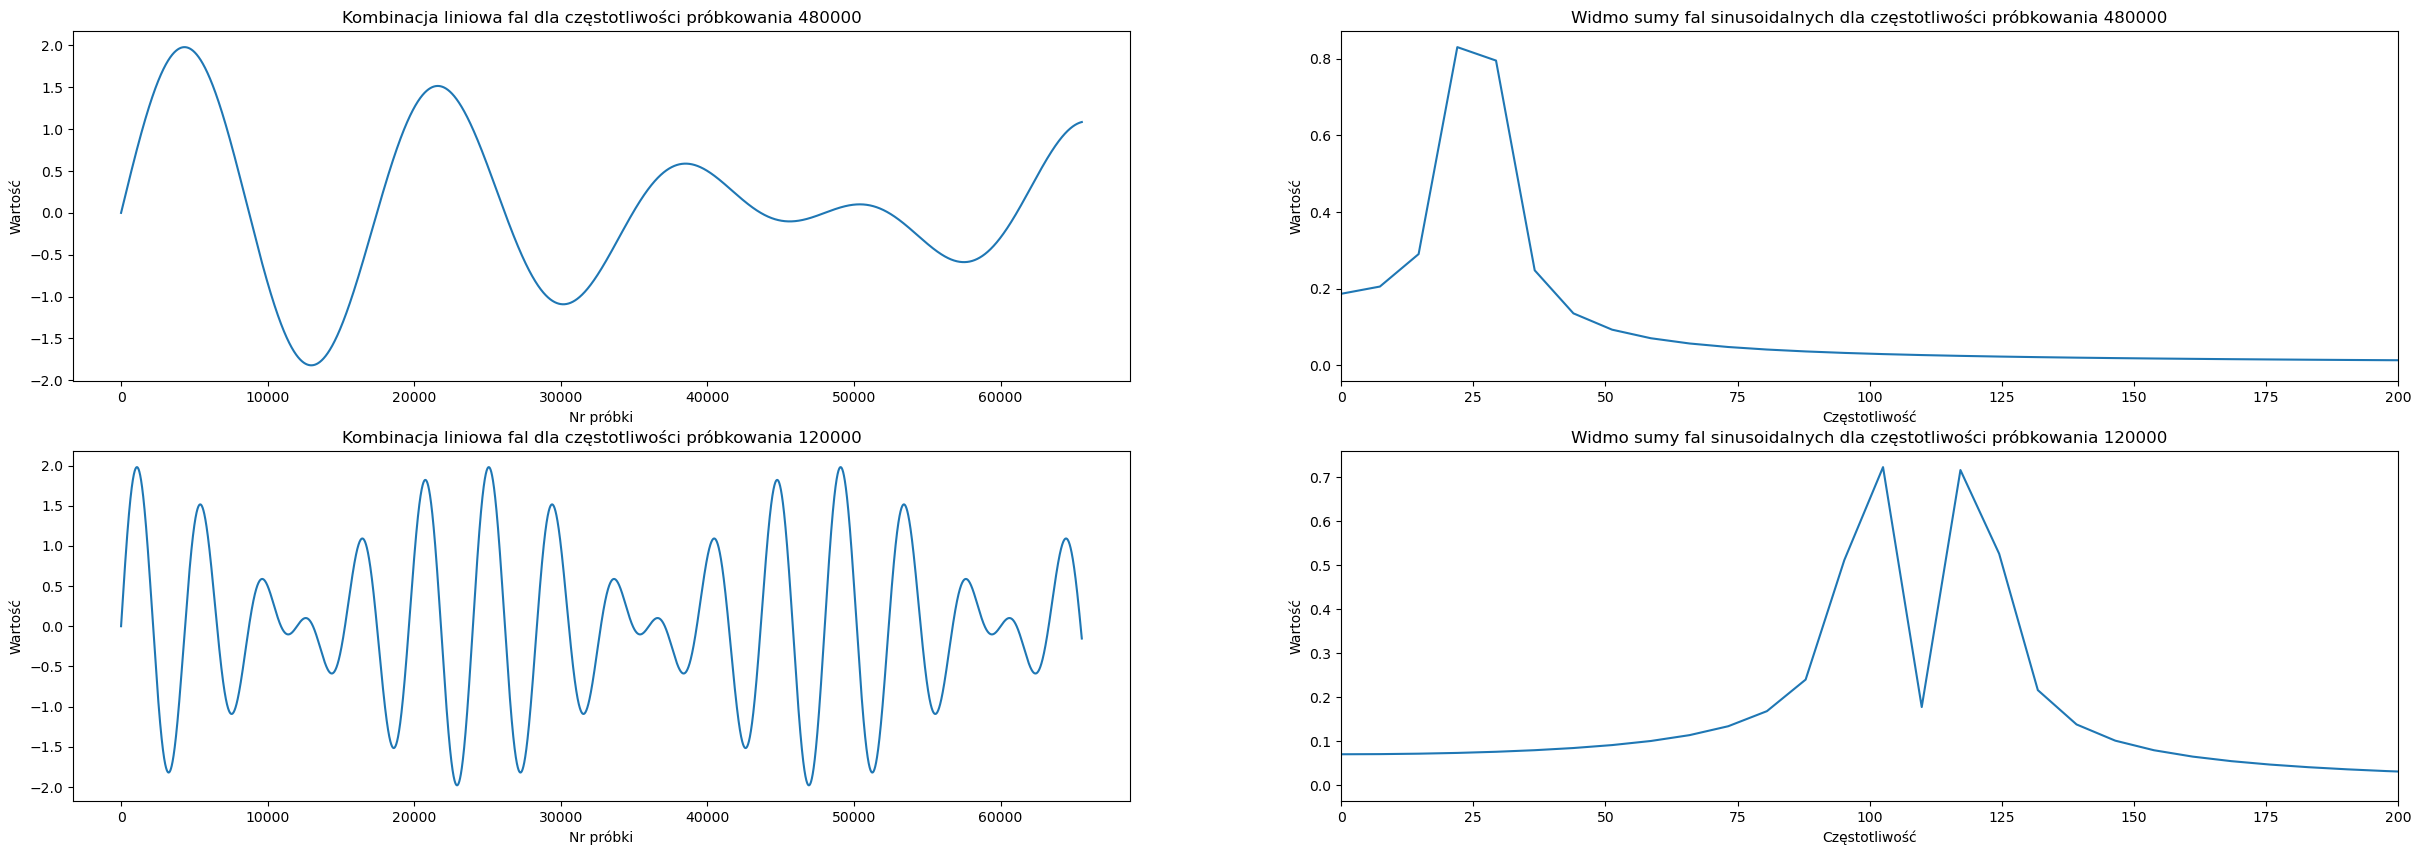

In [24]:
x = np.arange(length)
y1 = np.sin(np.pi/480000 * x * frequency1) #  częstotliwość sygnału 50 Hz
y2 = np.sin(np.pi/480000 * x * frequency2) #  częstotliwość sygnału 60 Hz

spectrum_two_sin = np.fft.rfft(y1 + y2) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistych sygnałów wejściowych

plt.figure(figsize=(30,10))

plt.subplot(2, 2, 1) # wyrysowanie wykresu
plt.plot(x,y1 + y2)
plt.title('Kombinacja liniowa fal dla częstotliwości próbkowania 480000')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.subplot(2, 2, 2) # wyrysowanie wykresu
plt.plot(frequency, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 200)
plt.title('Widmo sumy fal sinusoidalnych dla częstotliwości próbkowania 480000')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

x = np.arange(length)
y1 = np.sin(np.pi/120000 * x * frequency1) #  częstotliwość sygnału 50 Hz
y2 = np.sin(np.pi/120000 * x * frequency2) #  częstotliwość sygnału 60 Hz

spectrum_two_sin = np.fft.rfft(y1 + y2) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistych sygnałów wejściowych

plt.subplot(2, 2, 3) # wyrysowanie wykresu
plt.plot(x,y1 + y2)
plt.title('Kombinacja liniowa fal dla częstotliwości próbkowania 120000')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.subplot(2, 2, 4) # wyrysowanie wykresu
plt.plot(frequency, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 200)
plt.title('Widmo sumy fal sinusoidalnych dla częstotliwości próbkowania 120000')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

plt.show()

### 5. Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2 i porównaj z ciągami oryginalnymi.

Kod ten przedstawia proces generowania i analizy fali sinusoidalnej o częstotliwości **50 Hz** przy częstotliwości próbkowania **480 kHz**, a następnie jej odwrotnej transformaty Fouriera (IFFT) w celu odtworzenia sygnału. Najpierw tworzona jest tablica `x` zawierająca indeksy próbek o długości **65536**, a wartości `y` są obliczane jako próbki fali sinusoidalnej według wzoru \( y = \sin(2\pi f x / f_s) \), gdzie `f` to częstotliwość sygnału, a `fs` to częstotliwość próbkowania. Następnie wykres tej fali jest rysowany przy użyciu `plt.plot()`.  

W dalszej części kodu wykonywana jest **dyskretna transformata Fouriera (FFT)** za pomocą `np.fft.rfft(y)`, co pozwala uzyskać widmo amplitudowe sygnału. Następnie na jego podstawie wykonywana jest odwrotna transformata Fouriera `np.fft.irfft(y_spectrum)`, której wynikiem jest odtworzony sygnał w dziedzinie czasu. Wykres tego sygnału jest rysowany w drugiej części kodu. W efekcie powinniśmy zobaczyć, że odwrotnie przekształcony sygnał odpowiada oryginalnej fali sinusoidalnej, co potwierdza poprawność przeprowadzonych operacji.

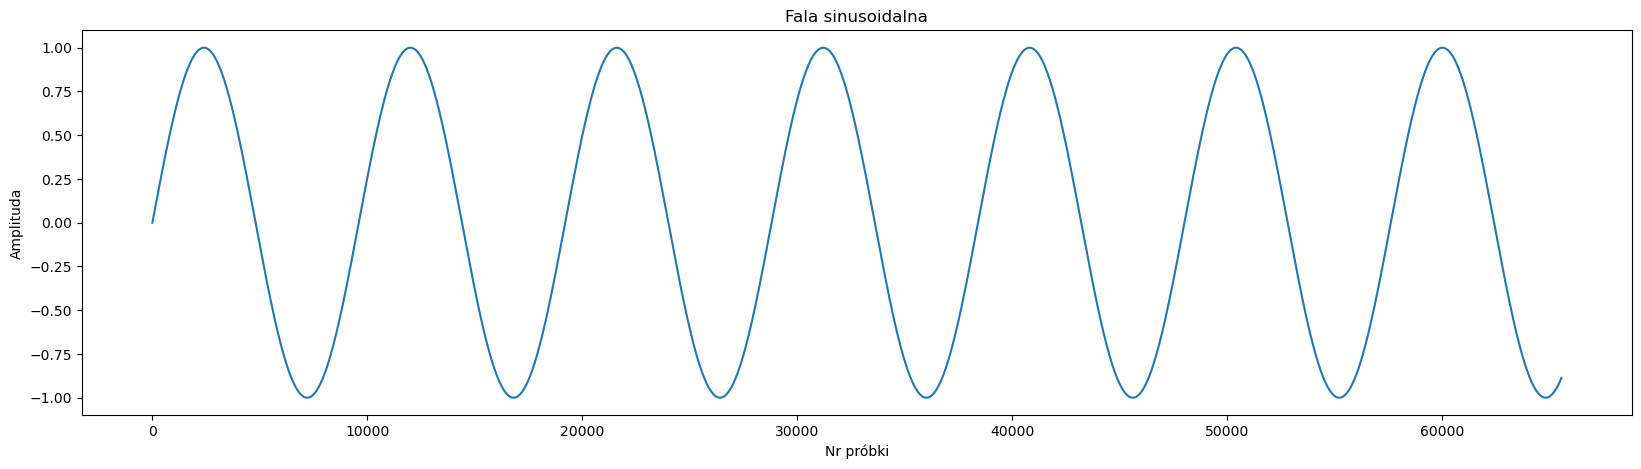

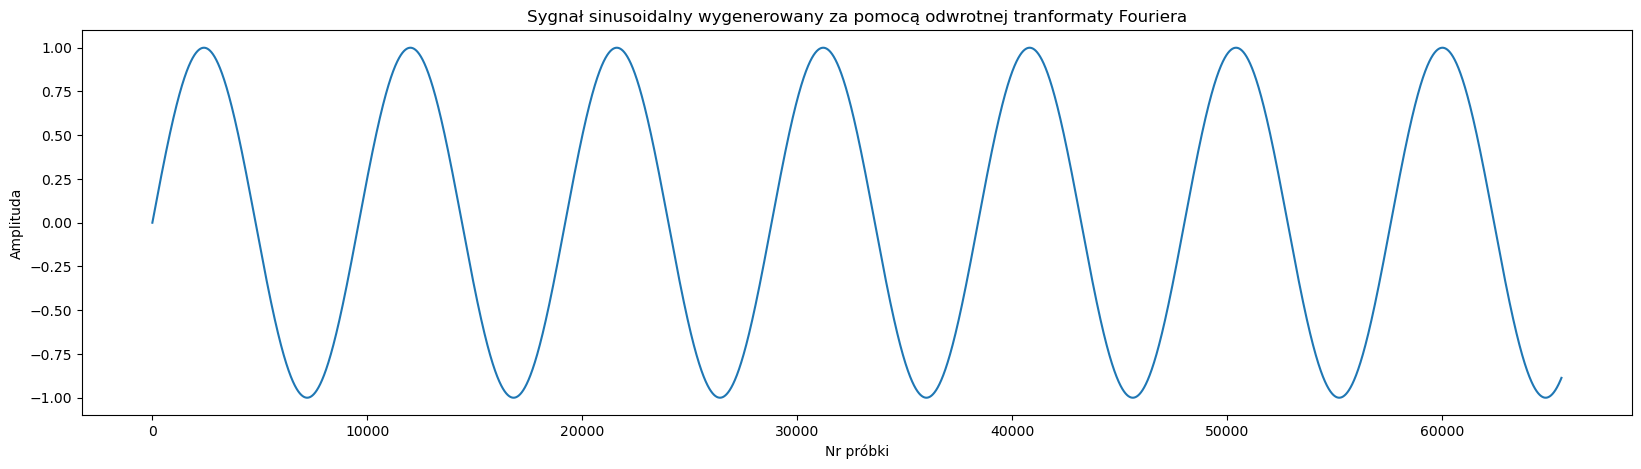

In [27]:
length = 65536 
f = 50        
fs = 480000 

x = np.arange(length)           
y = np.sin(2 * np.pi * x * f / fs)  

plt.figure(figsize=(20,5))    
plt.plot(x, y)              
plt.xlabel('Nr próbki') 
plt.ylabel('Amplituda')   
plt.title('Fala sinusoidalna')

x = plt.show()

y_spectrum = np.fft.rfft(y)
plot = np.real(np.fft.irfft(y_spectrum)) # funkcja np.fft.irfft oblicza odwrotną transformatę fouriera dla sygnału rzeczywistego

plt.figure(figsize=(20, 5))
plt.plot(plot)
plt.title('Sygnał sinusoidalny wygenerowany za pomocą odwrotnej tranformaty Fouriera')
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')

plt.show()

### Wnioski:

Podczas ćwiczenia 2 udało się zdobyć praktyczne doświadczenie w stosowaniu dyskretnej transformaty Fouriera (DFT) i jej odwrotności (IDFT) za pomocą funkcji numpy.fft i numpy.ifft. Tworzyliśmy sygnały sinusoidalne o znanych częstotliwościach, co pozwoliło lepiej zrozumieć, jak te częstotliwości są reprezentowane w widmie sygnału. Zauważyliśmy, że transformata Fouriera skutecznie wykrywa obecność konkretnych częstotliwości – w widmie pojawiały się wyraźne piki.
Na koniec zostały porównywane sygnały odtworzone z transformaty odwrotnej z sygnałami oryginalnymi. Otrzymane wyniki były bardzo podobne, co potwierdziło poprawność przeprowadzonych obliczeń. Ćwiczenie pozwoliło również przypomnieć sobie zasady działania transformacji sygnałów w dziedzinie częstotliwości i poćwiczyć pracę z bibliotekami NumPy i Matplotlib.